# Telecom Domain

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

In [3]:
customer_churn = pd.read_csv(r'D:\Learnbay\Weekend Project Sunduram sir\TELECOM\Telcom Data.csv')

In [4]:
customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
customer_churn.shape

(7043, 21)

In [6]:
customer_churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Information

In [7]:
customer_churn.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Obeservation 
- NO missing data
- 1 float , 2 int and 18 object (including dependent variable churn)

## Data cleaning 

### Data Duplication 

In [8]:
customer_churn.duplicated().sum()

0

### Data Imbalance

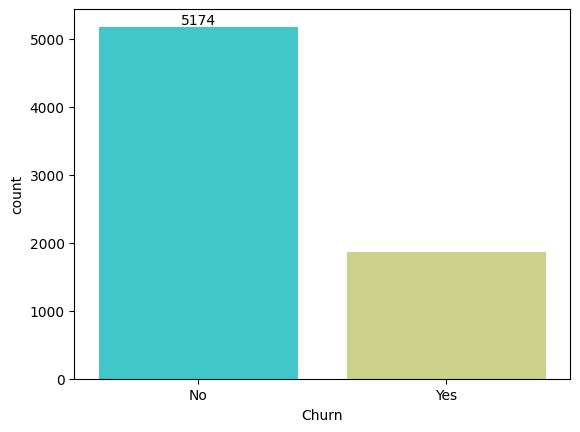

In [9]:
ax = sns.countplot(x=customer_churn['Churn'] , palette='rainbow')
ax.bar_label(ax.containers[0])
plt.show()

### Observation
- data is imbalance

In [10]:
customer_churn['Churn'].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

### Encode the dependent variable (Churn)
- Yes : 1
- No  : 0

In [11]:
customer_churn['Churn'] = customer_churn['Churn'].replace({'Yes' : 1  , 'No' : 0})

In [12]:
customer_churn['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

## EDA

In [13]:
def classify_feature(x):
    categorical_feature = []
    non_categorical_feature = []
    discreate_feature = []
    continues_feature = []

    for column in x.columns:
        if x[column].dtype in ['object' , 'bool']:
            if x[column].nunique() < 5:
                categorical_feature.append(column)
            else:
                non_categorical_feature.append(column)
        elif x[column].dtype in ['int64' , 'float64']:
            if x[column].nunique() < 10:
                discreate_feature.append(column)
            else:
                continues_feature.append(column)
    
    return categorical_feature , non_categorical_feature , discreate_feature  ,continues_feature
                

In [14]:
categorical_feature , non_categorical_feature , discreate_feature  ,continues_feature = classify_feature(customer_churn)

In [15]:
categorical_feature

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [16]:
non_categorical_feature

['customerID', 'TotalCharges']

In [17]:
discreate_feature

['SeniorCitizen', 'Churn']

In [18]:
continues_feature

['tenure', 'MonthlyCharges']

In [19]:
for i in categorical_feature:
    print(customer_churn[i].value_counts())
    print()
for i in discreate_feature:
    print(customer_churn[i].value_counts())
    print()

gender
Male      3555
Female    3488
Name: count, dtype: int64

Partner
No     3641
Yes    3402
Name: count, dtype: int64

Dependents
No     4933
Yes    2110
Name: count, dtype: int64

PhoneService
Yes    6361
No      682
Name: count, dtype: int64

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

StreamingTV
No                 

### Unique 

In [20]:
for i in customer_churn.columns:
    print(i)
    print(set(customer_churn[i]))
    print()

customerID
{'0218-QNVAS', '2074-GUHPQ', '4664-NJCMS', '2506-CLAKW', '9419-IPPBE', '9153-BTBVV', '0356-ERHVT', '3577-AMVUX', '0997-YTLNY', '8749-TZYEC', '7139-JZFVG', '2789-CZANW', '7562-UXTPG', '2778-OCLGR', '6924-TDGMT', '0679-IDSTG', '4905-JEFDW', '6614-VBEGU', '5047-LHVLY', '7065-YUNRY', '6377-WHAOX', '0531-XBKMM', '6024-RUGGH', '2800-QQUSO', '8670-ERCJH', '7636-XUHWW', '6114-TCFID', '5734-EJKXG', '8739-XNIKG', '8901-HJXTF', '8610-WFCJF', '3800-LYTRK', '0019-EFAEP', '0824-VWDPO', '3794-NFNCH', '6486-LHTMA', '5947-SGKCL', '6416-YJTTB', '8869-LIHMK', '3620-MWJNE', '3566-CAAYU', '4825-FUREZ', '8109-YUOHE', '5387-ASZNZ', '7831-QGOXH', '0853-TWRVK', '1397-XKKWR', '8514-VZHEB', '7602-MVRMB', '0818-OCPZO', '4785-FCIFB', '2123-VSCOT', '7147-AYBAA', '8421-WZOOW', '9351-HXDMR', '6419-ZTTLE', '0562-FGDCR', '4583-PARNH', '4190-MFLUW', '2277-BKJKN', '9822-WMWVG', '0447-BEMNG', '2575-GFSOE', '1240-HCBOH', '9500-WBGRP', '4075-WKNIU', '5681-LLOEI', '5816-SCGFC', '3863-IUBJR', '3170-GWYKC', '1452-XR

### Obeservation
- TotalCharges is wrongly clasified

## Correct the wrongly classified feature (TotalCharges)

In [21]:
customer_churn["TotalCharges"] = customer_churn["TotalCharges"].replace({' ': np.nan})

In [22]:
customer_churn["TotalCharges"].isnull().sum()

11

In [23]:
customer_churn["TotalCharges"] = customer_churn["TotalCharges"].fillna(customer_churn["TotalCharges"].mode()[0])

In [24]:
customer_churn["TotalCharges"].isnull().sum()

0

In [25]:
customer_churn["TotalCharges"] =customer_churn["TotalCharges"].astype("float64")
customer_churn["TotalCharges"].dtype

dtype('float64')

## Droping Unnessery feature

In [26]:
customer_churn.drop(columns=['customerID'] , inplace=True)

In [27]:
customer_churn.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Encoding 
* One-Hot-Encoder (categroical data)

In [28]:
customer_churn = pd.get_dummies(customer_churn , columns=categorical_feature  ,drop_first=True)

In [29]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7043 non-null   float64
 4   Churn                                  7043 non-null   int64  
 5   gender_Male                            7043 non-null   bool   
 6   Partner_Yes                            7043 non-null   bool   
 7   Dependents_Yes                         7043 non-null   bool   
 8   PhoneService_Yes                       7043 non-null   bool   
 9   MultipleLines_No phone service         7043 non-null   bool   
 10  MultipleLines_Yes                      7043 non-null   bool   
 11  Inte

## Convert True : 1 False : 0

In [30]:
for i in customer_churn.select_dtypes('bool').columns:
    customer_churn[i] = customer_churn[i].replace({True : 1 , False : 0})

In [31]:
customer_churn.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [32]:
customer_churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.765853,0.265370,0.504756,0.483033,0.299588,0.903166,0.096834,...,0.216669,0.384353,0.216669,0.387903,0.209144,0.240664,0.592219,0.216101,0.335794,0.228880
std,0.368612,24.559481,30.090047,2266.762876,0.441561,0.500013,0.499748,0.458110,0.295752,0.295752,...,0.412004,0.486477,0.412004,0.487307,0.406726,0.427517,0.491457,0.411613,0.472301,0.420141
min,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Split Data into dependent and independent variable 

In [33]:
x  = customer_churn.drop(columns=['Churn']) #independent
y = customer_churn['Churn']                 #dependent

In [34]:
x.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [35]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

## Feature Scalling

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_column = ['tenure','MonthlyCharges',	'TotalCharges']
x[scaler_column] = pd.DataFrame(scaler.fit_transform(x[scaler_column]) , columns=scaler_column)

In [37]:
x.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-1.277445,-1.160323,-0.992638,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0.066327,-0.259629,-0.172181,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,-1.236724,-0.362660,-0.958093,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0.514251,-0.746535,-0.193689,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,-1.236724,0.197365,-0.938901,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


## Handle Imbalance Dataset

In [38]:
y.value_counts(normalize=True)

Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

In [39]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote , y_smote = smote.fit_resample(x,y)

In [51]:
y_smote.value_counts()

Churn
0    5174
1    5174
Name: count, dtype: int64

In [40]:
y_smote.value_counts(normalize=True)

Churn
0    0.5
1    0.5
Name: proportion, dtype: float64

## Split Data Training and testing 

In [41]:
from sklearn.model_selection import train_test_split
x_train ,x_test , y_train , y_test = train_test_split(x_smote , y_smote , test_size=0.3 , random_state=42)

In [42]:
x_train.shape  ,x_test.shape , y_train.shape , y_test.shape

((7243, 30), (3105, 30), (7243,), (3105,))

## Yprofiling (EDA)

In [ ]:
# from ydata_profiling import ProfileReport
# profile = ProfileReport(customer_churn, title="Profiling Report")
# profile.to_file("Y_Profiling.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Model Building 

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
# evaluation matrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

      Method Used  Accuracy
0  LogitRegession  0.811916
1           Dtree  0.769726
2         RForest  0.840258
3             XGB  0.830274
4             KNN  0.797101
5             SVM  0.811594
6             NBT  0.762963
7          Voting  0.832206
Axes(0.125,0.11;0.775x0.77)


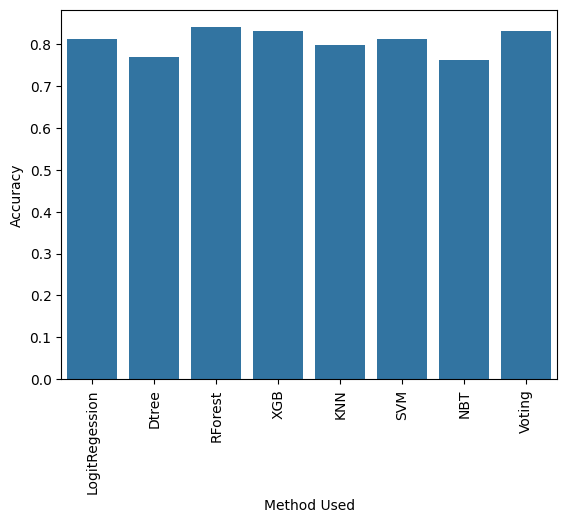

In [45]:

# LogisticRegression
logit = LogisticRegression()
logit = logit.fit(x_train, y_train)
y_pred_lr = logit.predict(x_test) 
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# DecisionTree
dtree = DecisionTreeClassifier()
dtree = dtree.fit(x_train, y_train)
y_pred_dt = dtree.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# RandomForest
rforest = RandomForestClassifier(criterion='entropy' , n_estimators=50)
rforest = rforest.fit(x_train, y_train)
y_pred_rf = rforest.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# XGBoost
xgboost = XGBClassifier()
xgboost = xgboost.fit(x_train, y_train)
y_pred_xg = xgboost.predict(x_test)
accuracy_xg = accuracy_score(y_test, y_pred_xg)

# KNN
knn = KNeighborsClassifier()
knn = knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
 
# SVM
svm = SVC()
svm = svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Naive Based Theorem
nbt = GaussianNB()
nbt = nbt.fit(x_train, y_train)
y_pred_nbt = nbt.predict(x_test)
accuracy_nbt = accuracy_score(y_test, y_pred_nbt)

# Voting Classifier - combining all the above model together by using voting classifier approach
model_evc = VotingClassifier(estimators = [('logit',logit), ('dtree',dtree), ('rforest',rforest),('xgboost',xgboost),
                                           ('knn',knn),('svm',svm),('nbt',nbt)])
model_evc = model_evc.fit(x_train, y_train)
pred_evc = model_evc.predict(x_test)
accuracy_evc = accuracy_score(y_test, pred_evc)

list1 = ['LogitRegession','Dtree','RForest','XGB','KNN','SVM','NBT','Voting']
list2 = [accuracy_lr,accuracy_dt,accuracy_rf,accuracy_xg,accuracy_knn,accuracy_svm,accuracy_nbt,accuracy_evc]
list3 = [logit,dtree,rforest,xgboost,knn,svm,nbt,model_evc]

df_accuracy = pd.DataFrame({"Method Used":list1, "Accuracy":list2})

print(df_accuracy)

chart = sns.barplot(x="Method Used", y="Accuracy", data=df_accuracy)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
print(chart)                          
                               

### Observation 
- Voting giving more accurate result

## Check underfitting and overfitting problem (high bias or high variance problem)- Bias-Variance Trade off

In [46]:
pred_evc_train = model_evc.predict(x_train)
pred_evc_test = model_evc.predict(x_test)
accuracy_evc_train = accuracy_score(y_train, pred_evc_train)
accuracy_evc_test = accuracy_score(y_test, pred_evc_test)

print("************************")
print("Training Accuracy :",accuracy_evc_train)
print("************************")
print("Test Accuracy :",accuracy_evc_test)

************************
Training Accuracy : 0.9057020571586359
************************
Test Accuracy : 0.8322061191626409


## Cross Validation 

In [47]:
from sklearn.model_selection import cross_val_score
training = cross_val_score(model_evc , x_train , y_train , cv=10)

In [48]:
training.mean()

0.8190030481996571

## Evaluation Matric

In [49]:
from sklearn.metrics import classification_report , confusion_matrix
print("************************")
print("Training :",classification_report(y_train, pred_evc_train))
print("************************")
print("Test :",classification_report(y_test, pred_evc_test))

************************
Training :               precision    recall  f1-score   support

           0       0.96      0.84      0.90      3600
           1       0.86      0.97      0.91      3643

    accuracy                           0.91      7243
   macro avg       0.91      0.91      0.91      7243
weighted avg       0.91      0.91      0.91      7243

************************
Test :               precision    recall  f1-score   support

           0       0.88      0.77      0.82      1574
           1       0.79      0.90      0.84      1531

    accuracy                           0.83      3105
   macro avg       0.84      0.83      0.83      3105
weighted avg       0.84      0.83      0.83      3105



In [50]:
print('Train')
print(confusion_matrix(y_train, pred_evc_train))
print()
print("Test")
print(confusion_matrix(y_test, pred_evc_test))

Train
[[3038  562]
 [ 121 3522]]

Test
[[1213  361]
 [ 160 1371]]
